In [1]:
print("Hello")

In [2]:
import numpy as np
import pandas as pd

In [3]:
Raw = pd.read_csv("data_set_test.csv")

In [4]:
#Raw.describe()
#Raw.head(5)
#type(Raw)
#len(Raw)
#Raw.columns
#Raw.dtypes
#len(Raw['user_id'].unique())
Raw

,user_id,store_partner,delivery_date,customer_province,gross_basket_delivered,source
0,27791,d25bfabaca150da1296148d555ad5cca,2019-01-28,RM,93.73,Ios-app
1,366484,9d1e8b3eca2a5725245e043f28b92d4d,2019-01-02,VR,72.28,Ios-app
2,717751,91c0f7100bde719c44790e7df757a1a6,2019-01-02,MI,152.69,website
3,1306963,18a5fc43689cfa082c65ee5b7c5eb69b,2019-01-02,BS,49.99,Ios-app
4,551754,d25bfabaca150da1296148d555ad5cca,2019-01-02,RM,23.70,website
...,...,...,...,...,...,...
173232,1601626,d25bfabaca150da1296148d555ad5cca,2019-06-20,RM,63.27,Android-app
173233,1470760,e7371e76f5037e256e19a59f7c6202d7,2019-06-20,MI,22.97,mobile-website
173234,1639454,e7371e76f5037e256e19a59f7c6202d7,2019-06-20,RM,31.54,Android-app
173235,1234975,e7371e76f5037e256e19a59f7c6202d7,2019-06-20,RM,30.41,Android-app


### 1. Average gross basket delivered per store_partner


In [5]:
#creating variable for Font formatting
start = "\033[1m"
end = "\033[0;0m"
print(start + "Average gross basket delivered per store_partner" + end)

#Filtering the data and grouping store partners
SP = pd.DataFrame(Raw[['store_partner','gross_basket_delivered']].groupby('store_partner').mean().sort_values('gross_basket_delivered',ascending=0))
SP

Average gross basket delivered per store_partner


,gross_basket_delivered
store_partner,
36a56a6d8cdf3cd9f3ed28f45edc228e,66.672690
0b5cb0ec5f538ad96aec1269bec93c9c,65.109516
7d0a652939fef190954db21b4fb37bcf,64.433554
6786836d1f31bd2394c92e3128725e26,63.622453
18a5fc43689cfa082c65ee5b7c5eb69b,61.815076
bd976df7c4663d5ac72e0320fc4bfdd2,61.499307
d25bfabaca150da1296148d555ad5cca,61.411060
9d1e8b3eca2a5725245e043f28b92d4d,60.441304
e7371e76f5037e256e19a59f7c6202d7,59.541575


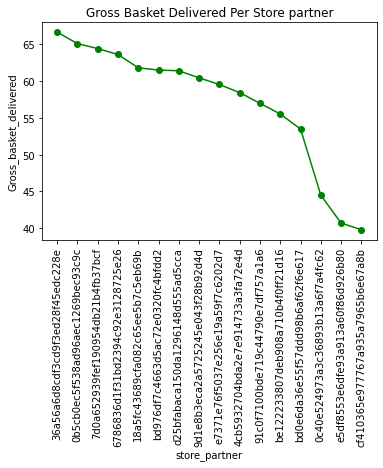

In [6]:
#Plotting graph
import matplotlib.pyplot as plt

plt.plot(SP.index,SP["gross_basket_delivered"],color='Green', marker='o')
plt.title('Gross Basket Delivered Per Store partner')
plt.xlabel(SP.index.name)
plt.ylabel('Gross_basket_delivered')
plt.xticks(rotation=90)
plt.show()

### Alternate Way

In [7]:
#using Pivot table to generate report
ACS = Raw.pivot_table(index='store_partner',values='gross_basket_delivered',aggfunc='mean').sort_values(by=['gross_basket_delivered'],ascending=False)
print(ACS)

                                  gross_basket_delivered
store_partner                                           
36a56a6d8cdf3cd9f3ed28f45edc228e               66.672690
0b5cb0ec5f538ad96aec1269bec93c9c               65.109516
7d0a652939fef190954db21b4fb37bcf               64.433554
6786836d1f31bd2394c92e3128725e26               63.622453
18a5fc43689cfa082c65ee5b7c5eb69b               61.815076
bd976df7c4663d5ac72e0320fc4bfdd2               61.499307
d25bfabaca150da1296148d555ad5cca               61.411060
9d1e8b3eca2a5725245e043f28b92d4d               60.441304
e7371e76f5037e256e19a59f7c6202d7               59.541575
4cb5932704bda2e7e914733a3fa72e4d               58.428594
91c0f7100bde719c44790e7df757a1a6               56.981976
be122233807deb908a710b4f0ff21d16               55.520937
bd0e6da36e55f57ddd98b6af62f6e617               53.470845
0c40e524973a3c36893b13a6f7a4fc62               44.453810
e5df8553e6dfe93a913a60f86d926b80               40.674444
cf410365e977767a935a7965b6e67a8

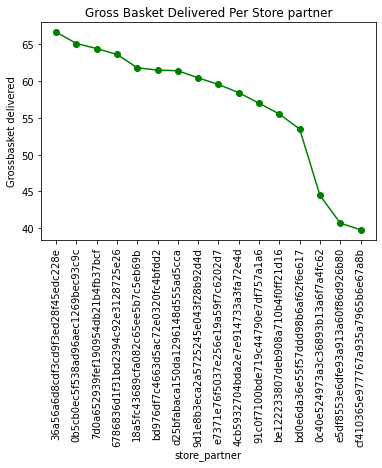

In [8]:
#plotting graph
import matplotlib.pyplot as plt

plt.plot(ACS.index,ACS["gross_basket_delivered"],color='Green', marker='o')
plt.title('Gross Basket Delivered Per Store partner')
plt.xlabel(ACS.index.name)
plt.ylabel('Grossbasket delivered')
plt.xticks(rotation=90)
plt.show()

### 2. For Customers with minimum of 3 orders

In [9]:
#generating unique list of customers
Users = pd.DataFrame(Raw['user_id'].unique(),columns=['user_id'])

#Generating User list with minimum 3 orders
rec = []
for us in Users.index:
    #print(Users.loc[us,'user_id'])
    DS = Raw.loc[(Raw.user_id)== us]
    if len(DS) >= 3:
        rec.append(Users.loc[us,'user_id'])

#Segmenting/Filtering the RAW data
DD = Raw[Raw.user_id.isin(rec)]

#Generating store_partner wise gross_basket_delivered
CST = DD.pivot_table(index='store_partner',values='gross_basket_delivered',aggfunc='mean').sort_values(by=['gross_basket_delivered'],ascending=False)
print(CST)

                                  gross_basket_delivered
store_partner                                           
d25bfabaca150da1296148d555ad5cca              116.872612
18a5fc43689cfa082c65ee5b7c5eb69b               94.045952
0b5cb0ec5f538ad96aec1269bec93c9c               85.963077
36a56a6d8cdf3cd9f3ed28f45edc228e               67.455932
6786836d1f31bd2394c92e3128725e26               58.454000
e7371e76f5037e256e19a59f7c6202d7               58.316095
bd976df7c4663d5ac72e0320fc4bfdd2               57.912727
9d1e8b3eca2a5725245e043f28b92d4d               57.023828
7d0a652939fef190954db21b4fb37bcf               55.932500
91c0f7100bde719c44790e7df757a1a6               55.049583
4cb5932704bda2e7e914733a3fa72e4d               52.195671


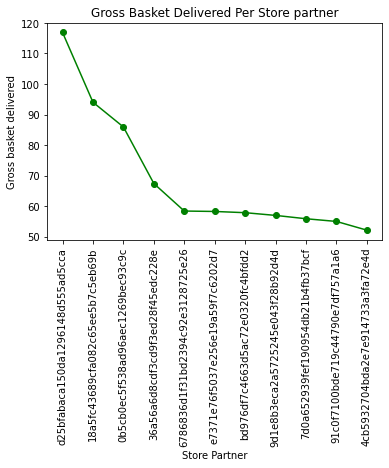

In [10]:
#Plotting Graph
import matplotlib.pyplot as plt

plt.plot(CST.index,CST["gross_basket_delivered"],color='Green', marker='o')
plt.title('Gross Basket Delivered Per Store partner')
plt.xlabel('Store Partner')
plt.ylabel('Gross basket delivered')
plt.xticks(rotation=90)
plt.show()

Additional Analysis

In [11]:
#generating unique list of customers
Users = pd.DataFrame(Raw['user_id'].unique(),columns=['user_id'])

#Generating User list with minimum 3 orders
rec = []
for us in Users.index:
    #print(Users.loc[us,'user_id'])
    DS = Raw.loc[(Raw.user_id)== us]
    if len(DS) < 3:
        rec.append(Users.loc[us,'user_id'])

#Segmenting/Filtering the RAW data
DD = Raw[Raw.user_id.isin(rec)]

#Generating store_partner wise gross_basket_delivered
CSM = DD.pivot_table(index='store_partner',values='gross_basket_delivered',aggfunc='mean').sort_values(by=['gross_basket_delivered'],ascending=False)
print(CSM)

                                  gross_basket_delivered
store_partner                                           
36a56a6d8cdf3cd9f3ed28f45edc228e               66.666884
0b5cb0ec5f538ad96aec1269bec93c9c               64.886207
7d0a652939fef190954db21b4fb37bcf               64.469521
6786836d1f31bd2394c92e3128725e26               63.682798
18a5fc43689cfa082c65ee5b7c5eb69b               61.643874
bd976df7c4663d5ac72e0320fc4bfdd2               61.519518
d25bfabaca150da1296148d555ad5cca               60.854951
9d1e8b3eca2a5725245e043f28b92d4d               60.471946
e7371e76f5037e256e19a59f7c6202d7               59.552026
4cb5932704bda2e7e914733a3fa72e4d               58.489106
91c0f7100bde719c44790e7df757a1a6               56.994577
be122233807deb908a710b4f0ff21d16               55.520937
bd0e6da36e55f57ddd98b6af62f6e617               53.470845
0c40e524973a3c36893b13a6f7a4fc62               44.453810
e5df8553e6dfe93a913a60f86d926b80               40.674444
cf410365e977767a935a7965b6e67a8

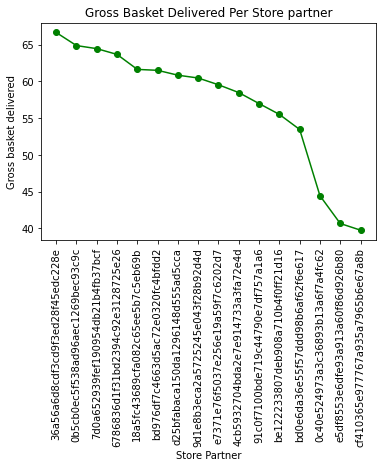

In [12]:
#Plotting Graph
import matplotlib.pyplot as plt

plt.plot(CSM.index,CSM["gross_basket_delivered"],color='Green', marker='o')
plt.title('Gross Basket Delivered Per Store partner')
plt.xlabel('Store Partner')
plt.ylabel('Gross basket delivered')
plt.xticks(rotation=90)
plt.show()

In [13]:
#DD
#len(DD)

### 3. Hypothesis : Average gross basket delivered increases with the number of orders for each customer.


#### Generating a Random Sample to test the Hypothesis

In [14]:
samp = DD.sample()
User_ID = samp['user_id'].values[0]
#type(samp)
#print(samp)
#print(User_ID)

#### Code for testing the hypothesis

   **Steps performed for generating the trend for number of orders and gross basket delivered**
   * Extract **order records** for the **sample user ID**
   * Generating **Average gross basket delivered with the number of orders for the sample customer**
   * Plotting the line chat for **Average gross basket delivered with the number of orders for the sample customer**

In [15]:
order_mean = []
#using generated order list of user'stransaction
records = DD.loc[(Raw.user_id)== User_ID]
#print(len(records))

#Incrementally changing the number of orders and finding the average of gross basket delivered
for y in range(1,len(records)+1):
    #for x in records:
    #if records.loc[x,'user_id'] == User_ID:
    if y <= len(records)+1:
        tot_ord = records.head(y)
        #print(len(tot_ord))
        gr_ba_delivered = tot_ord['gross_basket_delivered'].mean()
        order_mean.append([y,gr_ba_delivered])

In [16]:
#records

In [17]:
df = pd.DataFrame(order_mean,columns=['Number of order','Gross_basket_delivered'])
print('Gross_basket_delivered per Customer for customer ID :' , User_ID)
df

Gross_basket_delivered per Customer for customer ID : 792213


,Number of order,Gross_basket_delivered
0,1,47.290000
1,2,112.855000
2,3,100.940000
3,4,91.705000
4,5,86.216000
5,6,78.868333
6,7,87.390000
7,8,84.431250
8,9,89.947778
9,10,87.953000


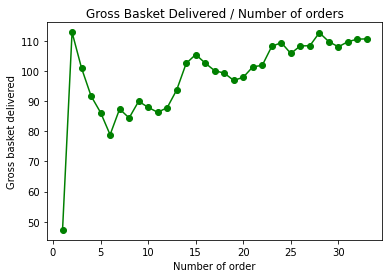

In [18]:
#Plotting Graph
import matplotlib.pyplot as plt

plt.plot((df["Number of order"]),df["Gross_basket_delivered"],color='Green', marker='o')
plt.title('Gross Basket Delivered / Number of orders')
plt.xlabel('Number of order')
plt.ylabel('Gross basket delivered')
plt.show()

## Are customers loyal to the store partners?

#### Calculating number of loyal customers
* **Assumption:** Customer Who bought **total of 3 or more products** and from the **same store partner** are considered as **loyal Customers.**

In [19]:
#Extracting Unique user id
usrs_SP = Raw.user_id.unique()
rec = []
#Filtering the Data for loyal Customers
for us in Users.index:
    #print(Users.loc[us,'user_id'])
    DS = Raw.loc[(Raw.user_id)== us]
    if len(DS) >= 3:
        if len(DS['store_partner'].unique()) == 1:
            rec.append(us)
print(start,'Number of loyal customers: ', end, len(rec))

 Number of loyal customers:   124


* **Assumption:** Customer Who bought **total of 3 or more products** and using the **same source** are considered as **loyal Customers.**

In [20]:
#Extracting Unique user id
usrs_SP = Raw.user_id.unique()
rec = []
#Filtering the Data for loyal Customers
for us in Users.index:
    #print(Users.loc[us,'user_id'])
    DS = Raw.loc[(Raw.user_id)== us]
    if len(DS) >= 3:
        if len(DS['source'].unique()) == 1:
            rec.append(us)
print(start,'Number of loyal customers: ', end, len(rec))

 Number of loyal customers:   259


* **Assumption:** Customer Who bought **total of 5 or more products in the period** are considered as **loyal Customers.**

In [21]:
#Extracting Unique user id
usrs_SP = Raw.user_id.unique()
rec = []
#Filtering the Data for loyal Customers
for us in Users.index:
    #print(Users.loc[us,'user_id'])
    DS = Raw.loc[(Raw.user_id)== us]
    if len(DS) >= 5:
        rec.append(us)
print(start,'Number of loyal customers: ', end, len(rec))

 Number of loyal customers:   253


* **Assumption:** Customer Who bought **minimum of 3 products** and **miminum transaction of 15 Euros in the period** 
are considered as **loyal Customers.**

In [22]:
#Extracting Unique user id
usrs_SP = Raw.user_id.unique()
rec = []
#Filtering the Data for loyal Customers
for us in Users.index:
    #print(Users.loc[us,'user_id'])
    DS = Raw.loc[(Raw.user_id)== us]
    if len(DS) >= 3:
        if DS.gross_basket_delivered.min() > 15:
            rec.append(us)
print(start,'Number of loyal customers: ', end, len(rec))

 Number of loyal customers:   331


### 5. How many customers switch province?

In [23]:
#Extracting Unique user id
usrs_SP = Raw.user_id.unique()
rec = []
#Filtering the Data for loyal Customers
for x in usrs_SP:
    DS = Raw.loc[(Raw.user_id)== x]
    if len(DS['customer_province'].unique()) != 1:
        rec.append(x)
print(start,'number of customers who switched Province: ', end, len(rec))

 number of customers who switched Province:   199


### 6. How many customers switch sources?

In [24]:
#Extracting Unique user id
usrs_SS = Raw.user_id.unique()
rec = []
#Filtering the Data for loyal Customers
for x in usrs_SS:
    DS = Raw.loc[(Raw.user_id)== x]
    if len(DS['source'].unique()) != 1:
        rec.append(x)
print(start,'number of customers who switched Sources: ', end, len(rec))

 number of customers who switched Sources:   5438
